In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve, root
from scipy.optimize import fmin

# **Przedstawienie problemu**

W projekcie rozważamy model dyfuzji zaproponowany przez F.M. Bassa opisujący wzrost zakupu nowego produktu. Zakłada się, że zakup nowego produktu jest funkcją informacji zewnętrznej
(innowacji) i wpływu innych konsumentów (imitacji). Wzrost ten
stosowano do przewidywania dyfuzji innowacji w handlu detalicznym, technologii przemysłowej, rolnictwie oraz na rynku dóbr trwałego użytku.

Model Bassa można opisać za pomocą następującego
równania różniczkowego zwyczajnego

$$\frac{d}{dt}F(t) = p +F(t) (q-p)- q(F(t))^2,$$


które ma rozwiązanie postaci
$$F(t) = \frac{1-e^{-(p+q)t}}{1+\frac{q}{p}e^{-(p+q)t}},$$

gdzie

$\frac{d}{dt}F(t)$ - tempo zmian w skumulowanej liczbie nabywców, którzy wdrożyli
innowację w czasie t, 

$F(t)$ - ogólna liczba nabywców, którzy wdrożyli innowację w czasie t, 

$p$ - współczynnik innowacji (prawdopodobieństwo pierwszego zakupu przez
grupę innowatorów), 

$q$ - współczynnik imitacji (prawdopodobieństwo, ze potencjalny nabywca
zacznie kupować produkt pod wpływem innych konsumentów, którzy
juz dokonali zakupu).

Średnia wartość prawdopobieństwa $p$ jest estymowana przez $0.03$, a zazwyczaj jest mniejsza od $0.01$, natomiast średnią wartość $q$ estymuje się na $0.38$, a najczęściej znajduje się ona w przedziale $(0.3, 0.5)$.

In [ ]:
p = 0.03
q = 0.38
x_0 = 0.
t_0 = 0.
T = 2.

def f(t,x): # prawa strona równania
  return p + x*(q - p) - q*x**2
def g(t): # prawdziwe rozwiązanie 
  return (1. - np.exp((-p-q)*t))/(1. + q/p*np.exp((-p-q)*t))

**Badanie istnienia i jednoznaczności rozwiązania**

Niech $K = \{(t,x): \hspace{0.3cm} t \in [-\alpha,\alpha],\hspace{0.15cm} x \in [-\beta,\beta] \} = [-\alpha,\alpha]\times[-\beta,\beta]$.

Z twierdzenia Picarda jeśli funkcja $f(t,x) = p +x (q-p)- qx^2,\hspace{0.3cm} p,q >0,q>p $ jest lipschitzowska na zbiorze $K$ ze względu na drugą zmienną ze stałą $L$ oraz $M = \max\limits_{K}|f(t,x)|$, wtedy istnieje rozwiązanie w przedziale $[-\delta,\delta]$, gdzie $\delta = \min\{\alpha,\frac{\beta}{M},\frac{1}{L}\}$ i jest ono jednoznaczne.

Lipschitzowskość:
\begin{align*} 
|f(t,x)-f(t,y)| &\leq |(q-p)(x-y)-q(x^2-y^2)| \\ 
 &\leq |q-p||x-y|+|q||x+y||x-y| \\
 &\leq (q-p)|x-y| + 2q\beta|x-y| \\
 &\leq (q-p+2q\beta)|x-y|
\end{align*}

Zatem $L = q-p+2q\beta$.

$M = \max\limits_{K}|p +x (q-p)- qx^2| = \max\limits_{K} \{|p-\beta(q-p)-\beta^2q|,\frac{(p+q)^2}{4q} \}$.

In [ ]:
def F(Z):
  p = 0.03
  q = 0.38
  a, b = Z
  return -min(a, b/max((p+q)**2/(4*q), np.abs(-q*b**2-b*(q-p)+p)), 1./(q-p+2*q*b))

In [ ]:
minimum = fmin(F, [2, 1])
minimum # array na końcu zwraca a, b maksymalizujące deltę

Optimization terminated successfully.
         Current function value: -1.946900
         Iterations: 105
         Function evaluations: 209


array([2.89718819, 0.21531181])

In [ ]:
-F([2.89718819,0.21531181])

1.9469003352647263

Stąd badany problem posiada jednoznaczne rozwiązanie w przedziale $[-1.9469,1.9469]$ i możemy je przedłużyć na całą oś rzeczywistą.

# **Metody**

## Runge-Kutta

![alt text](https://drive.google.com/uc?id=1xIcO43AE8U9n96adriWi3CM7sSVt7Co2)

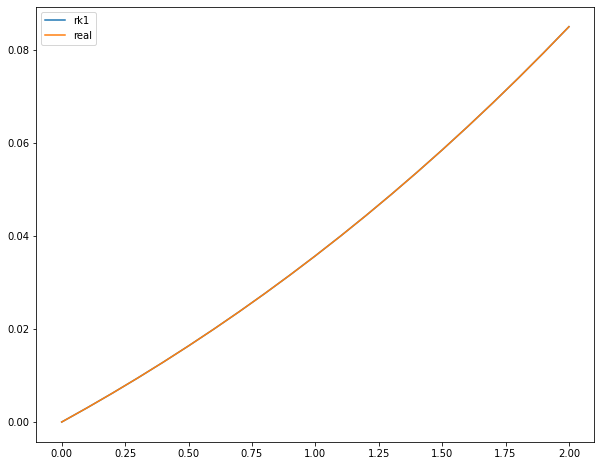

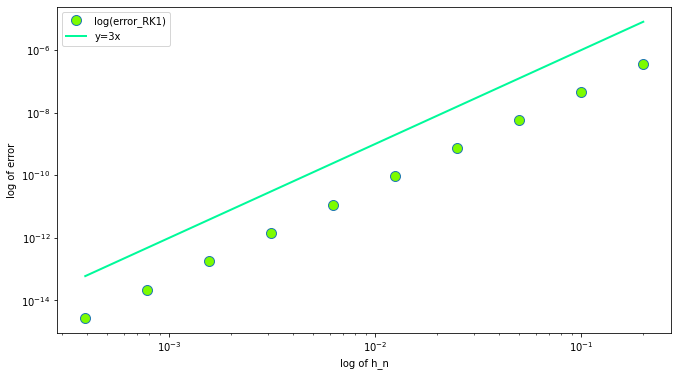

In [ ]:
n = 20 # wykres prawdziwego rozwiązania i numerycznego tylko dla 20 punktów
def RK1(R, n, f, t_0, T, x_0):
    h = T/n
    R[0]=[t_0,x_0]
    for i in range (1, n+1):

      def SOLVE_K1(P):
        K1 = P
        return K1- f(R[i-1][0] + 0.5*h, R[i-1][1] + h*0.5*K1)

      def SOLVE_K2(P):
        K2 = P
        return K2 - f(R[i-1][0] + 2./3*h, R[i-1][1] + 1./6*h*k1 + 0.5*h*K2)

      def SOLVE_K3(P):
        K3 = P
        return K3 - f(R[i-1][0] + 0.5*h, R[i-1][1] - 0.5*h*k1 + 0.5*h*k2 + 0.5*h*K3)

      def SOLVE_K4(P):
        K4 = P
        return K4 - f(R[i-1][0] + h, R[i-1][1] + 1.5*h*k1 - 1.5*h*k2 + 0.5*h*k3 + 0.5*h*K4)
      
      k1 = fsolve(SOLVE_K1, 0.0)
      k2 = fsolve(SOLVE_K2, 0.0)
      k3 = fsolve(SOLVE_K3, 0.0)
      k4 = fsolve(SOLVE_K4, 0.0)
      R[i] = [t_0 + i*h, R[i-1][1] + 1.5*h*k1 - 1.5*h*k2 + 0.5*h*k3 + 0.5*h*k4]


R_RK1 = np.zeros(shape=(n+1,2)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
RK1(R_RK1, n, f, t_0, T, x_0)
R_RK1

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y = zip(*R_RK1)
plt.figure(figsize=(10,8))
G = [g(i) for i in x]
plt.plot(x, y, label='rk1')
plt.plot(x, G, label='real')
plt.legend()

# funkcja ERROR wpisuje do tablicy e błędy dla danego n oraz wpisuje do tablicy E ilorazy błędów dla i*n i (i+1)*n
def ERROR_RK1(E, e, k, f, g, t_0, T, x_0):
    for i in range(k):
        R = np.empty(shape=(5*(2**(i+1))+1,2))
        RK1(R,5*(2**(i+1)), f, t_0, T, x_0)
        e[i] = np.abs(R[5*(2**(i+1))][1]-g(T))
    for i in range(len(e)-1):
        E[i] = e[i]/e[i+1]

n = 10 
E_RK1 = np.empty(n-1)
e_RK1 = np.empty(n)
ERROR_RK1(E_RK1, e_RK1, n, f, g, t_0, T, x_0)

h_n = [2./(5*(2**(i+1))) for i in range(n)]

log_h_n = np.log10(h_n)
logerrors = np.log10(e_RK1)

mn = 10**np.min(log_h_n)
mx = 10**np.max(log_h_n)

X = np.linspace(mn,mx,500)
Y = [(i**3)/1000 for i in X] 

plt.figure(figsize=(11,6))
plt.loglog(h_n, e_RK1, 'o', markersize=10, markerfacecolor='lawngreen', label='log(error_RK1)')
plt.loglog(X, Y, color='#00fa9a', linewidth='2', label='y=3x')
#plt.loglog(X, X, color='mediumvioletred', linewidth='2', label='y=x')
plt.xlabel('log of h_n')
plt.ylabel('log of error')
plt.legend()
plt.show()

In [ ]:
E_RK1

array([7.87577641, 7.94393267, 7.97337913, 7.9870369 , 7.99361023,
       7.99837107, 7.99682097, 8.07071339, 8.27979275])

In [ ]:
e_RK1

array([3.64609408e-07, 4.62950431e-08, 5.82772350e-09, 7.30897579e-10,
       9.15104797e-11, 1.14479537e-11, 1.43128565e-12, 1.78981829e-13,
       2.21767049e-14, 2.67841305e-15])

## Gauss-Legendre

![alt text](https://drive.google.com/uc?id=1mimGvhmWJo0TPkR0ZJwmBruQHLjS2reo)

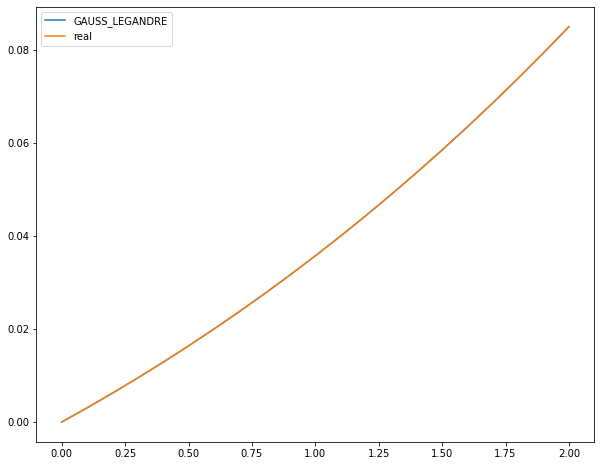

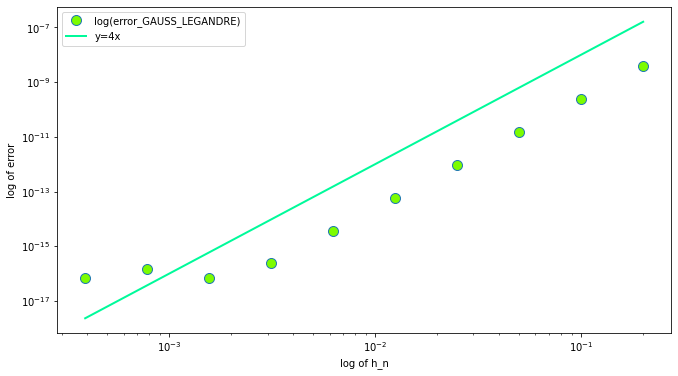

In [ ]:
n = 20 # wykres prawdziwego rozwiązania i numerycznego tylko dla 20 punktów
def GAUSS_LEGANDRE(R, n, f, t_0, T, x_0):
    h = T/n
    p = np.sqrt(3)/6
    R[0]=[t_0, x_0]
    for i in range (1, n+1):

      def SOLVE(P):
        K_1, K_2 = P
        return K_1 - f(R[i-1][0] + (0.5 - p)*h, R[i-1][1] + h*(0.25*K_1 + (0.25 - p)*K_2)), K_2 - f(R[i-1][0] + (0.5 + p)*h, R[i-1][1] + h*((0.25 + p)*K_1 + 0.25*K_2))

      S = fsolve(SOLVE, (0.0, 0.0))
      R[i] = [t_0 + i*h, R[i-1][1] + 0.5*h*(S[0] + S[1])]




R_GAUSS_LEGANDRE = np.zeros(shape=(n+1,2)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
GAUSS_LEGANDRE(R_GAUSS_LEGANDRE, n, f, t_0, T, x_0)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y = zip(*R_GAUSS_LEGANDRE)
plt.figure(figsize=(10,8))
G = [g(i) for i in x]
plt.plot(x, y, label='GAUSS_LEGANDRE')
plt.plot(x, G, label='real')
plt.legend()

# funkcja ERROR wpisuje do tablicy e błędy dla danego n oraz wpisuje do tablicy E ilorazy błędów dla i*n i (i+1)*n
def ERROR_GAUSS_LEGANDRE(E, e, k, f, g, t_0, T, x_0):
    for i in range(k):
        R = np.empty(shape=(5*(2**(i+1))+1,2))
        GAUSS_LEGANDRE(R,5*(2**(i+1)), f, t_0, T, x_0)
        e[i]=np.abs(R[5*(2**(i+1))][1]-g(T))
    for i in range(len(e)-1):
        E[i]=e[i]/e[i+1]

n = 10 
E_GAUSS_LEGANDRE = np.empty(n-1)
e_GAUSS_LEGANDRE = np.empty(n)
ERROR_GAUSS_LEGANDRE(E_GAUSS_LEGANDRE, e_GAUSS_LEGANDRE, n, f, g, t_0, T, x_0)

h_n = [2./(5*(2**(i+1))) for i in range(n)]

log_h_n = np.log10(h_n)
logerrors = np.log10(e_GAUSS_LEGANDRE)

mn=10**np.min(log_h_n)
mx=10**np.max(log_h_n)

X = np.linspace(mn,mx,500)
Y = [(i**4)/10000 for i in X] 

plt.figure(figsize=(11,6))
plt.loglog(h_n, e_GAUSS_LEGANDRE, 'o', markersize=10, markerfacecolor='lawngreen', label='log(error_GAUSS_LEGANDRE)')
plt.loglog(X, Y, color='#00fa9a', linewidth='2', label='y=4x')
#plt.loglog(X, X, color='mediumvioletred', linewidth='2', label='y=x')
plt.xlabel('log of h_n')
plt.ylabel('log of error')
plt.legend()
plt.show()

In [ ]:
E_GAUSS_LEGANDRE

array([16.00299012, 16.00103363, 15.99996943, 16.00415851, 15.66283525,
       15.35294118,  3.4       ,  0.45454545,  2.2       ])

In [ ]:
e_GAUSS_LEGANDRE

array([3.71990888e-09, 2.32450864e-10, 1.45272405e-11, 9.07954267e-13,
       5.67323966e-14, 3.62210262e-15, 2.35922393e-16, 6.93889390e-17,
       1.52655666e-16, 6.93889390e-17])

## Adams-Moulton

![alt text](https://drive.google.com/uc?id=1Oa885HTD7kRkQbG-po5JNTEkUZscu6-q)

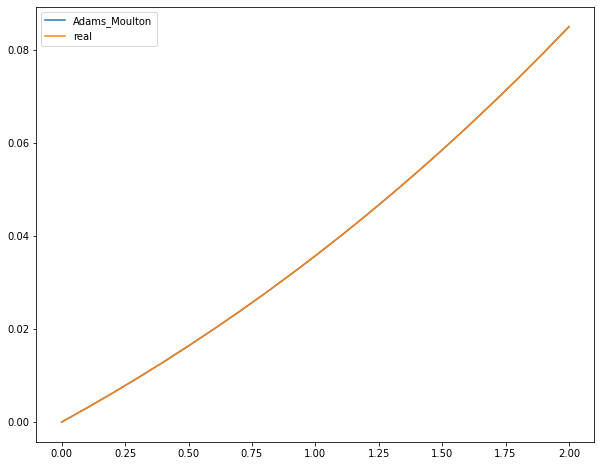

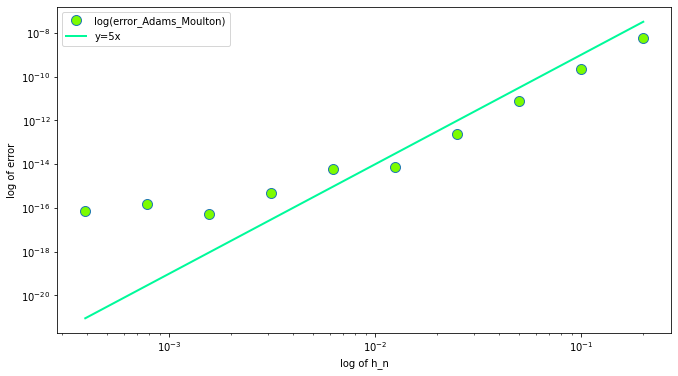

In [ ]:
n = 20 # wykres prawdziwego rozwiązania i numerycznego tylko dla 20 punktów
def Adams_Moulton(R, n, f, t_0, T, x_0): # 5-krokowy
    h = T/n
    b_1 = 251./720.
    b_2 = 646./720.
    b_3 = (-264.)/720.
    b_4 = 106./720.
    b_5 = (-19.)/720.
    R[0] = [t_0, x_0]
    F = [f(t_0, x_0)]
    for i in range(1,4):
      R[i] = [t_0 + i*h, g(t_0 + i*h)] # tworzymy (zakładamy, że je znamy, nie liczymy metodą jednokrokową) początkowe wartości w zależności od h
      F.append(f(R[i][0], R[i][1]))
    for i in range (4, n+1):

      def SOLVE(P):
        return P - R[i-1][1] - h*(b_2*F[i-1] + b_3*F[i-2] + b_4*F[i-3] + b_5*F[i-4] + b_1*f(t_0 + i*h, P))

      R[i] = [t_0 + i*h, fsolve(SOLVE, R[i-1][1])]
      F.append(f(R[i][0], R[i][1]))

R_Adams_Moulton = np.zeros(shape=(n+1,2)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
Adams_Moulton(R_Adams_Moulton, n, f, t_0, T, x_0)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y = zip(*R_Adams_Moulton)
plt.figure(figsize=(10,8))
G = [g(i) for i in x]
plt.plot(x, y, label='Adams_Moulton')
plt.plot(x, G, label='real')
plt.legend()

# funkcja ERROR wpisuje do tablicy e błędy dla danego n oraz wpisuje do tablicy E ilorazy błędów dla i*n i (i+1)*n
def ERROR_Adams_Moulton(E, e, k, f, g, t_0, T, x_0):
    for i in range(k):
        R = np.empty(shape=(5*(2**(i+1))+1,2))
        Adams_Moulton(R,5*(2**(i+1)), f, t_0, T, x_0)
        e[i]=np.abs(R[5*(2**(i+1))][1]-g(T))
    for i in range(len(e)-1):
        E[i]=e[i]/e[i+1]

n = 10 
E_Adams_Moulton = np.empty(n-1)
e_Adams_Moulton = np.empty(n)
ERROR_Adams_Moulton(E_Adams_Moulton, e_Adams_Moulton, n, f, g, t_0, T, x_0)

h_n = [2./(5*(2**(i+1))) for i in range(n)]

log_h_n = np.log10(h_n)
logerrors = np.log10(e_Adams_Moulton)

mn=10**np.min(log_h_n)
mx=10**np.max(log_h_n)

X = np.linspace(mn,mx,500)
Y = [(i**5)/10000 for i in X] 

plt.figure(figsize=(11,6))
plt.loglog(h_n, e_Adams_Moulton, 'o', markersize=10, markerfacecolor='lawngreen', label='log(error_Adams_Moulton)')
plt.loglog(X, Y, color='#00fa9a', linewidth='2', label='y=5x')
#plt.loglog(X, X, color='mediumvioletred', linewidth='2', label='y=x')
plt.xlabel('log of h_n')
plt.ylabel('log of error')
plt.legend()
plt.show()

In [ ]:
E_Adams_Moulton

array([25.57721281, 29.02441264, 30.56782713, 31.34946237,  1.32541568,
       12.75757576,  8.25      ,  0.36363636,  2.2       ])

In [ ]:
e_Adams_Moulton

array([5.50891111e-09, 2.15383558e-10, 7.42077233e-12, 2.42764142e-13,
       7.74380560e-15, 5.84254867e-15, 4.57966998e-16, 5.55111512e-17,
       1.52655666e-16, 6.93889390e-17])

## BDF4

![alt text](https://drive.google.com/uc?id=15LxE7vFBEHb-McuUv-rcnB9rUh_OCRiN)

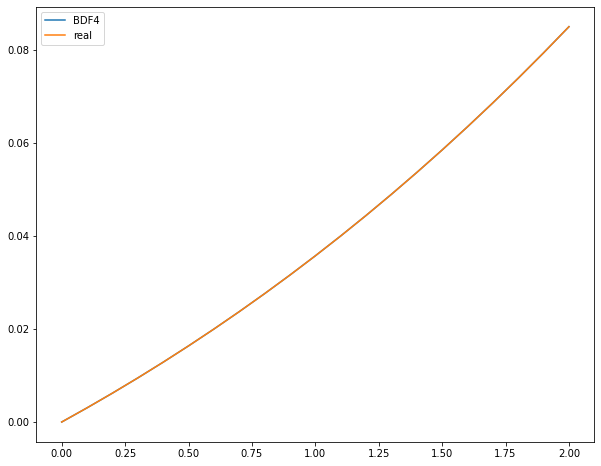

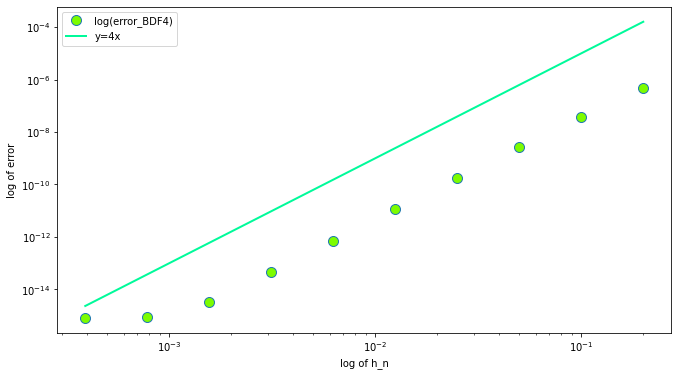

In [ ]:
n = 20 # wykres prawdziwego rozwiązania i numerycznego tylko dla 20 punktów
def BDF4(R, n, f, t_0, T, x_0): # 4-krokowy
    h = T/n
    b_4 = 12./25.
    a_1 = (-48.)/25.
    a_2 = 36./25.
    a_3 = (-16.)/25.
    a_4 = 3./25.
    R[0] = [t_0, x_0]
    F = [f(t_0, x_0)]
    for i in range(1,4):
      R[i] = [t_0 + i*h, g(t_0 + i*h)] # tworzymy (zakładamy, że je znamy, nie liczymy metodą jednokrokową) początkowe wartości w zależności od h
      F.append(f(R[i][0], R[i][1]))
    for i in range (4, n+1):

      def SOLVE(P):
        return P + a_1*R[i-1][1] + a_2*R[i-2][1] + a_3*R[i-3][1] + a_4*R[i-4][1] - b_4*h*f(t_0 + i*h, P)

      R[i] = [t_0 + i*h, fsolve(SOLVE, 0.0)]
      F.append(f(R[i][0], R[i][1]))

R_BDF4 = np.zeros(shape=(n+1,2)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
BDF4(R_BDF4, n, f, t_0, T, x_0)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y = zip(*R_BDF4)
plt.figure(figsize=(10,8))
G = [g(i) for i in x]
plt.plot(x, y, label='BDF4')
plt.plot(x, G, label='real')
plt.legend()

# funkcja ERROR wpisuje do tablicy e błędy dla danego n oraz wpisuje do tablicy E ilorazy błędów dla i*n i (i+1)*n
def ERROR_BDF4(E, e, k, f, g, t_0, T, x_0):
    for i in range(k):
        R = np.empty(shape=(5*(2**(i+1))+1,2))
        BDF4(R,5*(2**(i+1)), f, t_0, T, x_0)
        e[i]=np.abs(R[5*(2**(i+1))][1]-g(T))
    for i in range(len(e)-1):
        E[i]=e[i]/e[i+1]

n = 10 
E_BDF4 = np.empty(n-1)
e_BDF4 = np.empty(n)
ERROR_BDF4(E_BDF4, e_BDF4, n, f, g, t_0, T, x_0)

h_n = [2./(5*(2**(i+1))) for i in range(n)]

log_h_n = np.log10(h_n)
logerrors = np.log10(e_BDF4)

mn=10**np.min(log_h_n)
mx=10**np.max(log_h_n)

X = np.linspace(mn,mx,500)
Y = [(i**4)/10 for i in X] 

plt.figure(figsize=(11,6))
plt.loglog(h_n, e_BDF4, 'o', markersize=10, markerfacecolor='lawngreen', label='log(error_BDF4)')
plt.loglog(X, Y, color='#00fa9a', linewidth='2', label='y=4x')
#plt.loglog(X, X, color='mediumvioletred', linewidth='2', label='y=x')
plt.xlabel('log of h_n')
plt.ylabel('log of error')
plt.legend()
plt.show()

In [ ]:
E_BDF4

array([12.11866184, 14.19319524, 15.12592959, 15.56998511, 15.78447758,
       15.86496463, 14.01293103,  3.80327869,  1.07017544])

In [ ]:
e_BDF4

array([4.57669160e-07, 3.77656515e-08, 2.66082802e-09, 1.75911702e-10,
       1.12981291e-11, 7.15774662e-13, 4.51166882e-14, 3.21964677e-15,
       8.46545056e-16, 7.91033905e-16])

## BDF6

![alt text](https://drive.google.com/uc?id=1-demQg4_cHudUgfrB-OLB2kydiExyIWS)

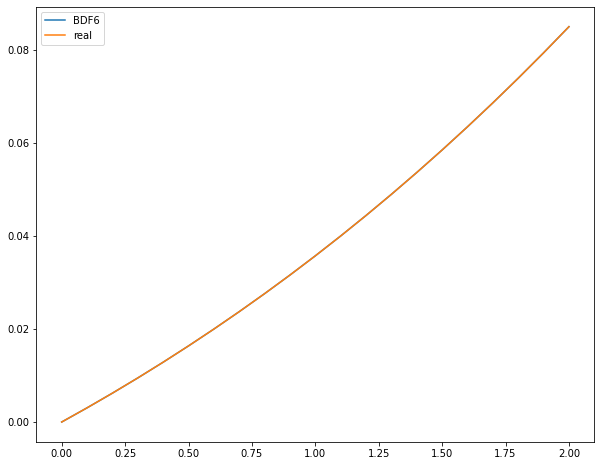

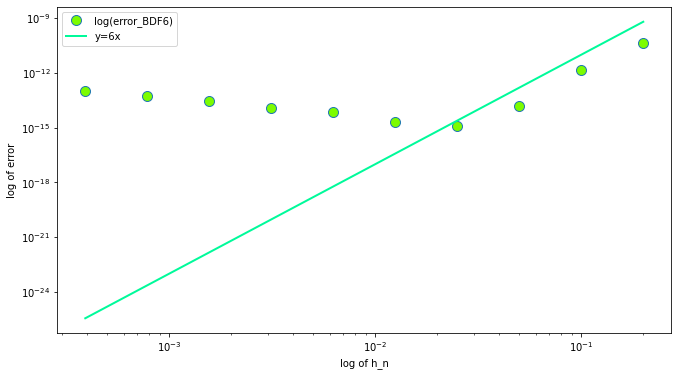

In [ ]:
n = 20 # wykres prawdziwego rozwiązania i numerycznego tylko dla 20 punktów
def BDF6(R, n, f, t_0, T, x_0): # 6-krokowy
    h = T/n
    b_6 = 60./147.
    a_1 = (-360.)/147.
    a_2 = 450./147.
    a_3 = (-400.)/147.
    a_4 = 225./147.
    a_5 = (-72.)/147.
    a_6 = 10./147.
    R[0] = [t_0, x_0]
    F = [f(t_0, x_0)]
    for i in range(1,6):
      R[i] = [t_0 + i*h, g(t_0 + i*h)] # tworzymy (zakładamy, że je znamy, nie liczymy metodą jednokrokową) początkowe wartości w zależności od h
      F.append(f(R[i][0], R[i][1]))
    for i in range (6, n+1):

      def SOLVE(P):
        return P + a_1*R[i-1][1] + a_2*R[i-2][1] + a_3*R[i-3][1] + a_4*R[i-4][1] + a_5*R[i-5][1] + a_6*R[i-6][1] - b_6*h*f(t_0 + i*h, P)

      R[i] = [t_0 + i*h, fsolve(SOLVE, 0.0)]
      F.append(f(R[i][0], R[i][1]))

R_BDF6 = np.zeros(shape=(n+1,2)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
BDF6(R_BDF6, n, f, t_0, T, x_0)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y = zip(*R_BDF6)
plt.figure(figsize=(10,8))
G = [g(i) for i in x]
plt.plot(x, y, label='BDF6')
plt.plot(x, G, label='real')
plt.legend()

# funkcja ERROR wpisuje do tablicy e błędy dla danego n oraz wpisuje do tablicy E ilorazy błędów dla i*n i (i+1)*n
def ERROR_BDF6(E, e, k, f, g, t_0, T, x_0):
    for i in range(k):
        R = np.empty(shape=(5*(2**(i+1))+1,2))
        BDF6(R,5*(2**(i+1)), f, t_0, T, x_0)
        e[i]=np.abs(R[5*(2**(i+1))][1]-g(T))
    for i in range(len(e)-1):
        E[i]=e[i]/e[i+1]

n = 10 
E_BDF6 = np.empty(n-1)
e_BDF6 = np.empty(n)
ERROR_BDF6(E_BDF6, e_BDF6, n, f, g, t_0, T, x_0)

h_n = [2./(5*(2**(i+1))) for i in range(n)]

log_h_n = np.log10(h_n)
logerrors = np.log10(e_BDF6)

mn=10**np.min(log_h_n)
mx=10**np.max(log_h_n)

X = np.linspace(mn,mx,500)
Y = [(i**6)/100000 for i in X] 

plt.figure(figsize=(11,6))
plt.loglog(h_n, e_BDF6, 'o', markersize=10, markerfacecolor='lawngreen', label='log(error_BDF6)')
plt.loglog(X, Y, color='#00fa9a', linewidth='2', label='y=6x')
#plt.loglog(X, X, color='mediumvioletred', linewidth='2', label='y=x')
plt.xlabel('log of h_n')
plt.ylabel('log of error')
plt.legend()
plt.show()

In [ ]:
E_BDF6

array([31.87910011, 94.8894052 , 11.44680851,  0.61437908,  0.30784708,
        0.56995413,  0.44062658,  0.51242879,  0.51707056])

In [ ]:
e_BDF6

array([4.51706450e-11, 1.41693601e-12, 1.49324997e-14, 1.30451205e-15,
       2.12330153e-15, 6.89726054e-15, 1.21014310e-14, 2.74641421e-14,
       5.35960165e-14, 1.03653197e-13])

Na naszym problemie nie widać empirycznej zbieżności, ponieważ błędy dla każdego n są bardzo małe, więc pokażemy zbieżność empiryczną na problemie Prothero-Robinsona.

In [ ]:
x_0 = 1.
def f(t,x):
  return -5.*(x-np.cos(t))-np.sin(t) # lambda = -5
def g(t):
  return np.cos(t)

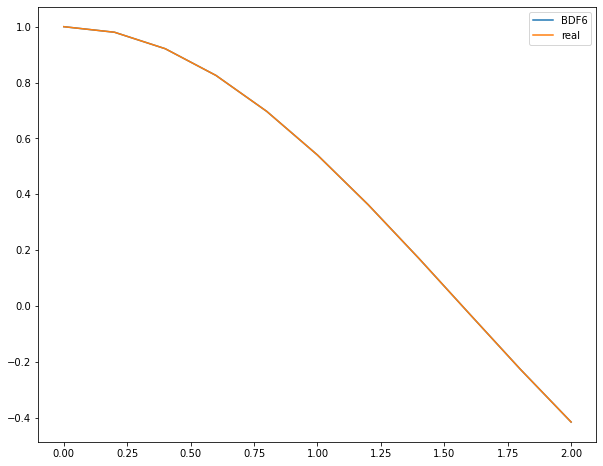

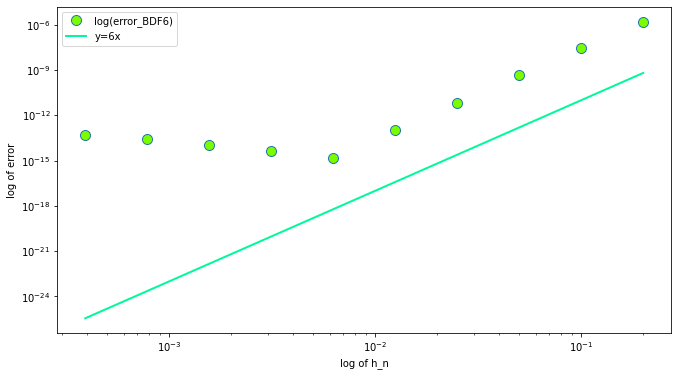

In [ ]:
R_BDF6 = np.zeros(shape=(n+1,2)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
BDF6(R_BDF6, n, f, t_0, T, x_0)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y = zip(*R_BDF6)
plt.figure(figsize=(10,8))
G = [g(i) for i in x]
plt.plot(x, y, label='BDF6')
plt.plot(x, G, label='real')
plt.legend()

# funkcja ERROR wpisuje do tablicy e błędy dla danego n oraz wpisuje do tablicy E ilorazy błędów dla i*n i (i+1)*n
def ERROR_BDF6(E, e, k, f, g, t_0, T, x_0):
    for i in range(k):
        R = np.empty(shape=(5*(2**(i+1))+1,2))
        BDF6(R,5*(2**(i+1)), f, t_0, T, x_0)
        e[i]=np.abs(R[5*(2**(i+1))][1]-g(T))
    for i in range(len(e)-1):
        E[i]=e[i]/e[i+1]

n = 10 
E_BDF6 = np.empty(n-1)
e_BDF6 = np.empty(n)
ERROR_BDF6(E_BDF6, e_BDF6, n, f, g, t_0, T, x_0)

h_n = [2./(5*(2**(i+1))) for i in range(n)]

log_h_n = np.log10(h_n)
logerrors = np.log10(e_BDF6)

mn=10**np.min(log_h_n)
mx=10**np.max(log_h_n)

X = np.linspace(mn,mx,500)
Y = [(i**6)/100000 for i in X] 

plt.figure(figsize=(11,6))
plt.loglog(h_n, e_BDF6, 'o', markersize=10, markerfacecolor='lawngreen', label='log(error_BDF6)')
plt.loglog(X, Y, color='#00fa9a', linewidth='2', label='y=6x')
#plt.loglog(X, X, color='mediumvioletred', linewidth='2', label='y=x')
plt.xlabel('log of h_n')
plt.ylabel('log of error')
plt.legend()
plt.show()

In [ ]:
E_BDF6

array([56.18793069, 64.11452535, 64.54975511, 65.63209076, 68.55555556,
        0.34615385,  0.39593909,  0.38104449,  0.59018265])

In [ ]:
e_BDF6

array([1.56818379e-06, 2.79096199e-08, 4.35308845e-10, 6.74377221e-12,
       1.02751141e-13, 1.49880108e-15, 4.32986980e-15, 1.09356968e-14,
       2.86992652e-14, 4.86277685e-14])

# **Absolutna stabilność dla układu równań liniowych**

Macierz układu:

\begin{bmatrix}
-1 & -1 & 0\\
0 & -1 & 2\\
1 & -1 & -2
\end{bmatrix}

Wartości własne:

\begin{align*} 
\lambda_1 &= -2 \\ 
\lambda_2 &= -1+i\sqrt{2}\\
\lambda_3 &= -1-i\sqrt{2}
\end{align*}



In [ ]:
def f(t, x, y, z):
  return [-x - y, -y + 2*z, x - y - 2*z]
def g(t):
  s = np.sqrt(2)
  return [-1./6*np.exp(-2*t)*(4 - 4*np.exp(t)*np.cos(s*t) + 5*s*np.exp(t)*np.sin(s*t)),
          1./3*np.exp(-2*t)*(-2 + 5*np.exp(t)*np.cos(s*t) + 2*s*np.exp(t)*np.sin(s*t)),
          -1./6*np.exp(-2*t)*(-2 - 4*np.exp(t)*np.cos(s*t) + 5*s*np.exp(t)*np.sin(s*t))]
t_0 = 0.
x_0_1 = 0.
x_0_2 = 1.
x_0_3 = 1.

## Metoda Runge-Kutty

In [ ]:
def RK_1_3_DIM(R, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3):
    R[0]=[t_0, x_0_1, x_0_2, x_0_3]
    for i in range (1, n+1):

      def SOLVE_K_1(P):
        K_1_0, K_1_1, K_1_2 = P
        return [K_1_0 - f(R[i-1][0] + 0.5*h, R[i-1][1] + h*0.5*K_1_0, R[i-1][2] + h*0.5*K_1_1, R[i-1][3] + h*0.5*K_1_2)[0],
        K_1_1 - f(R[i-1][0] + 0.5*h, R[i-1][1] + h*0.5*K_1_0, R[i-1][2] + h*0.5*K_1_1, R[i-1][3] + h*0.5*K_1_2)[1], 
        K_1_2 - f(R[i-1][0] + 0.5*h, R[i-1][1] + h*0.5*K_1_0, R[i-1][2] + h*0.5*K_1_1, R[i-1][3] + h*0.5*K_1_2)[2]]

      def SOLVE_K_2(P):
        K_2_0, K_2_1, K_2_2 = P
        return [K_2_0 - f(R[i-1][0] + 2./3*h, R[i-1][1] + 1./6*h*k1_0 + 0.5*h*K_2_0, R[i-1][2] + 1./6*h*k1_1 + 0.5*h*K_2_1, R[i-1][3] + 1./6*h*k1_2 + 0.5*h*K_2_2)[0],
        K_2_1 - f(R[i-1][0] + 2./3*h, R[i-1][1] + 1./6*h*k1_0 + 0.5*h*K_2_0, R[i-1][2] + 1./6*h*k1_1 + 0.5*h*K_2_1, R[i-1][3] + 1./6*h*k1_2 + 0.5*h*K_2_2)[1], 
        K_2_2 - f(R[i-1][0] + 2./3*h, R[i-1][1] + 1./6*h*k1_0 + 0.5*h*K_2_0, R[i-1][2] + 1./6*h*k1_1 + 0.5*h*K_2_1, R[i-1][3] + 1./6*h*k1_2 + 0.5*h*K_2_2)[2]]

      def SOLVE_K_3(P):
        K_3_0, K_3_1, K_3_2 = P
        return [K_3_0 - f(R[i-1][0] + 0.5*h, R[i-1][1] - 0.5*h*k1_0 + 0.5*h*k2_0 + 0.5*h*K_3_0, R[i-1][2] - 0.5*h*k1_1 + 0.5*h*k2_1 + 0.5*h*K_3_1, R[i-1][3] - 0.5*h*k1_2 + 0.5*h*k2_2 + 0.5*h*K_3_2)[0],
        K_3_1 - f(R[i-1][0] + 0.5*h, R[i-1][1] - 0.5*h*k1_0 + 0.5*h*k2_0 + 0.5*h*K_3_0, R[i-1][2] + - 0.5*h*k1_1 + 0.5*h*k2_1 + 0.5*h*K_3_1, R[i-1][3] - 0.5*h*k1_2 + 0.5*h*k2_2 + 0.5*h*K_3_2)[1],
        K_3_2 - f(R[i-1][0] + 0.5*h, R[i-1][1] - 0.5*h*k1_0 + 0.5*h*k2_0 + 0.5*h*K_3_0, R[i-1][2] + - 0.5*h*k1_1 + 0.5*h*k2_1 + 0.5*h*K_3_1, R[i-1][3] - 0.5*h*k1_2 + 0.5*h*k2_2 + 0.5*h*K_3_2)[2]]

      def SOLVE_K_4(P):
        K_4_0, K_4_1, K_4_2 = P
        return [K_4_0 - f(R[i-1][0] + h, R[i-1][1] + 1.5*h*k1_0 - 1.5*h*k2_0 + 0.5*h*k3_0 + 0.5*h*K_4_0, R[i-1][2] + 1.5*h*k1_1 - 1.5*h*k2_1 + 0.5*h*k3_1 + 0.5*h*K_4_1, R[i-1][3] + 1.5*h*k1_2 - 1.5*h*k2_2 + 0.5*h*k3_2 + 0.5*h*K_4_2)[0],
        K_4_1 - f(R[i-1][0] + h, R[i-1][1] + 1.5*h*k1_0 - 1.5*h*k2_0 + 0.5*h*k3_0 + 0.5*h*K_4_0, R[i-1][2] + 1.5*h*k1_1 - 1.5*h*k2_1 + 0.5*h*k3_1 + 0.5*h*K_4_1, R[i-1][3] + 1.5*h*k1_2 - 1.5*h*k2_2 + 0.5*h*k3_2 + 0.5*h*K_4_2)[1],
        K_4_2 - f(R[i-1][0] + h, R[i-1][1] + 1.5*h*k1_0 - 1.5*h*k2_0 + 0.5*h*k3_0 + 0.5*h*K_4_0, R[i-1][2] + 1.5*h*k1_1 - 1.5*h*k2_1 + 0.5*h*k3_1 + 0.5*h*K_4_1, R[i-1][3] + 1.5*h*k1_2 - 1.5*h*k2_2 + 0.5*h*k3_2 + 0.5*h*K_4_2)[2]]

      
      [k1_0, k1_1, k1_2] = fsolve(SOLVE_K_1, (0.0, 0.0, 0.0))
      [k2_0, k2_1, k2_2] = fsolve(SOLVE_K_2, (0.0, 0.0, 0.0))
      [k3_0, k3_1, k3_2] = fsolve(SOLVE_K_3, (0.0, 0.0, 0.0))
      [k4_0, k4_1, k4_2] = fsolve(SOLVE_K_4, (0.0, 0.0, 0.0))

      R[i] = [t_0 + i*h, R[i-1][1] + 1.5*h*k1_0 - 1.5*h*k2_0 + 0.5*h*k3_0 + 0.5*h*k4_0, 
              R[i-1][2] + 1.5*h*k1_1 - 1.5*h*k2_1 + 0.5*h*k3_1 + 0.5*h*k4_1, 
              R[i-1][3] + 1.5*h*k1_2 - 1.5*h*k2_2 + 0.5*h*k3_2 + 0.5*h*k4_2]

Z badania obszaru absolutnej stabilności wnioskujemy, że metoda RK_1 jest A-stabilna, więc dla dowolnie dużego kroku całkowania błąd globalny powinien zbiegać do 0 co pokazują poniższe przykłady.

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


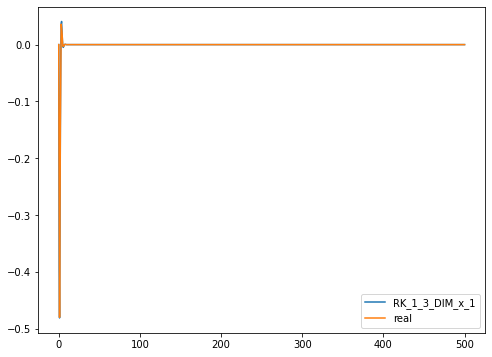

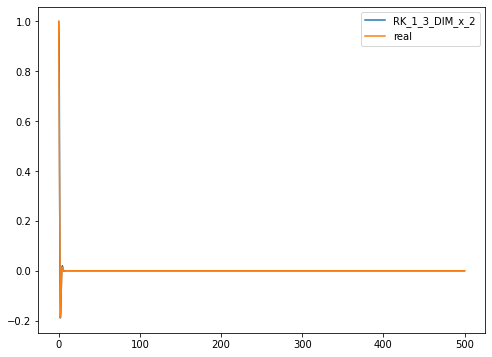

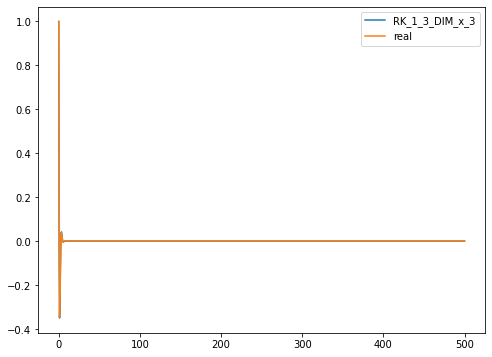

In [ ]:
n = 1000
h = 0.5
T = n*h

R_RK_1_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
RK_1_3_DIM(R_RK_1_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y,z,t = zip(*R_RK_1_3_DIM)

X = np.linspace(t_0,T,500)
Y_1 = [g(i)[0] for i in X]
Y_2 = [g(i)[1] for i in X]
Y_3 = [g(i)[2] for i in X]

plt.figure(figsize=(8,6))
plt.plot(x, y, label='RK_1_3_DIM_x_1')
plt.plot(X, Y_1, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, z, label='RK_1_3_DIM_x_2')
plt.plot(X, Y_2, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, t, label='RK_1_3_DIM_x_3')
plt.plot(X, Y_3, label='real')
plt.legend()

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


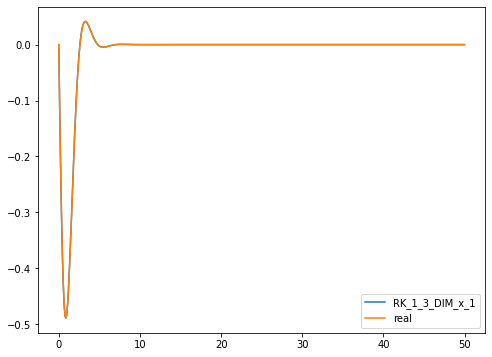

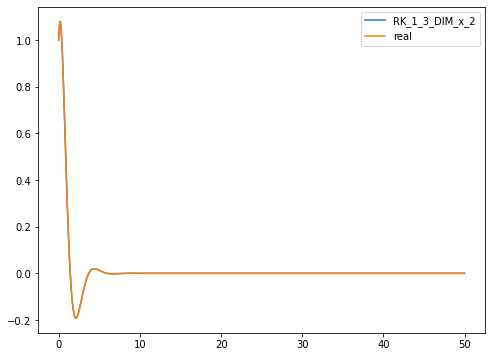

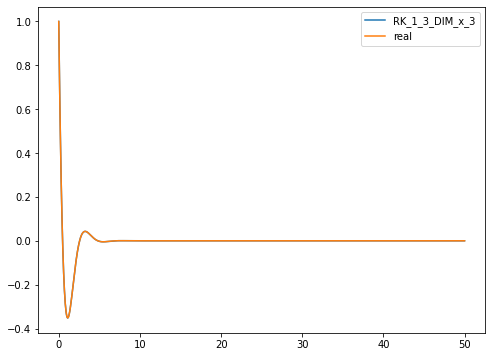

In [ ]:
h = 0.05
T = n*h

R_RK_1_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
RK_1_3_DIM(R_RK_1_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y,z,t = zip(*R_RK_1_3_DIM)

X = np.linspace(t_0,T,500)
Y_1 = [g(i)[0] for i in X]
Y_2 = [g(i)[1] for i in X]
Y_3 = [g(i)[2] for i in X]

plt.figure(figsize=(8,6))
plt.plot(x, y, label='RK_1_3_DIM_x_1')
plt.plot(X, Y_1, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, z, label='RK_1_3_DIM_x_2')
plt.plot(X, Y_2, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, t, label='RK_1_3_DIM_x_3')
plt.plot(X, Y_3, label='real')
plt.legend()

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Runtime

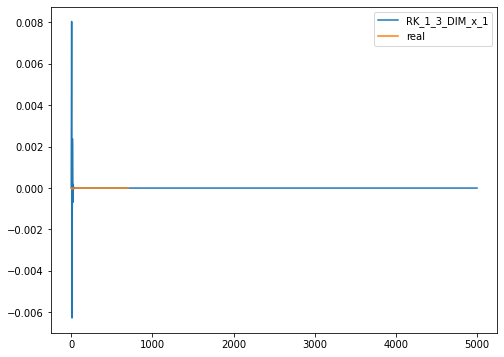

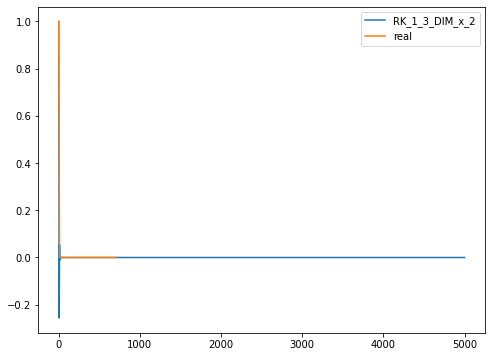

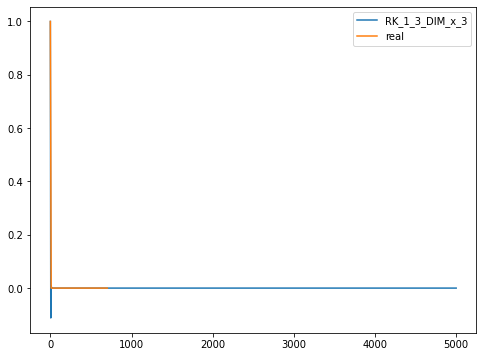

In [ ]:
h = 5
T = n*h

R_RK_1_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
RK_1_3_DIM(R_RK_1_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y,z,t = zip(*R_RK_1_3_DIM)

X = np.linspace(t_0,T,500)
Y_1 = [g(i)[0] for i in X]
Y_2 = [g(i)[1] for i in X]
Y_3 = [g(i)[2] for i in X]

plt.figure(figsize=(8,6))
plt.plot(x, y, label='RK_1_3_DIM_x_1')
plt.plot(X, Y_1, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, z, label='RK_1_3_DIM_x_2')
plt.plot(X, Y_2, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, t, label='RK_1_3_DIM_x_3')
plt.plot(X, Y_3, label='real')
plt.legend()

## Gauss-Legendre

In [ ]:
def GAUSS_LEGANDRE_3_DIM(R, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3):
    p = np.sqrt(3)/6
    R[0]=[t_0, x_0_1, x_0_2, x_0_3]
    for i in range (1, n+1):

      def SOLVE(P):
        K_1_0, K_2_0, K_1_1, K_2_1, K_1_2, K_2_2 = P
        return [K_1_0 - f(R[i-1][0] + (0.5 - p)*h, R[i-1][1] + h*(0.25*K_1_0 + (0.25 - p)*K_2_0), R[i-1][2] + h*(0.25*K_1_1 + (0.25 - p)*K_2_1), R[i-1][3] + h*(0.25*K_1_2 + (0.25 - p)*K_2_2))[0], 
        K_2_0 - f(R[i-1][0] + (0.5 + p)*h, R[i-1][1] + h*((0.25 + p)*K_1_0 + 0.25*K_2_0), R[i-1][2] + h*((0.25 + p)*K_1_1 + 0.25*K_2_1), R[i-1][3] + h*((0.25 + p)*K_1_2 + 0.25*K_2_2))[0], 
        K_1_1 - f(R[i-1][0] + (0.5 - p)*h, R[i-1][1] + h*(0.25*K_1_0 + (0.25 - p)*K_2_0), R[i-1][2] + h*(0.25*K_1_1 + (0.25 - p)*K_2_1), R[i-1][3] + h*(0.25*K_1_2 + (0.25 - p)*K_2_2))[1], 
        K_2_1 - f(R[i-1][0] + (0.5 + p)*h, R[i-1][1] + h*((0.25 + p)*K_1_0 + 0.25*K_2_0), R[i-1][2] + h*((0.25 + p)*K_1_1 + 0.25*K_2_1), R[i-1][3] + h*((0.25 + p)*K_1_2 + 0.25*K_2_2))[1],
        K_1_2 - f(R[i-1][0] + (0.5 - p)*h, R[i-1][1] + h*(0.25*K_1_0 + (0.25 - p)*K_2_0), R[i-1][2] + h*(0.25*K_1_1 + (0.25 - p)*K_2_1), R[i-1][3] + h*(0.25*K_1_2 + (0.25 - p)*K_2_2))[2], 
        K_2_2 - f(R[i-1][0] + (0.5 + p)*h, R[i-1][1] + h*((0.25 + p)*K_1_0 + 0.25*K_2_0), R[i-1][2] + h*((0.25 + p)*K_1_1 + 0.25*K_2_1), R[i-1][3] + h*((0.25 + p)*K_1_2 + 0.25*K_2_2))[2]]
      
      S = fsolve(SOLVE, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
      R[i] = [t_0 + i*h, R[i-1][1] + 0.5*h*(S[0] + S[1]), R[i-1][2] + 0.5*h*(S[2] + S[3]), R[i-1][3] + 0.5*h*(S[4] + S[5])]

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


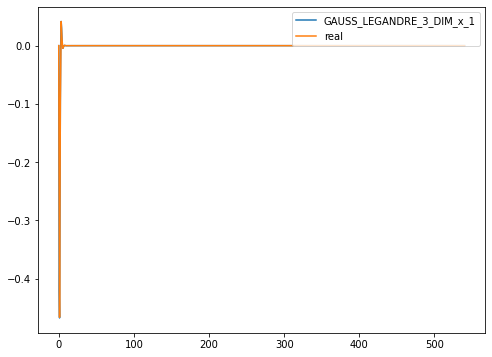

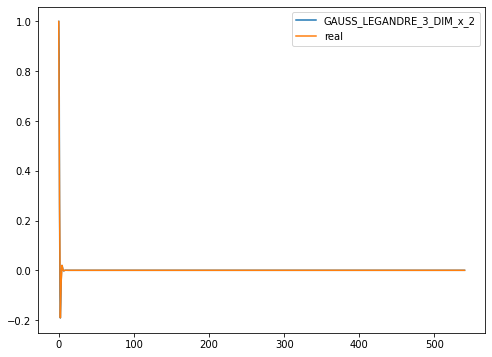

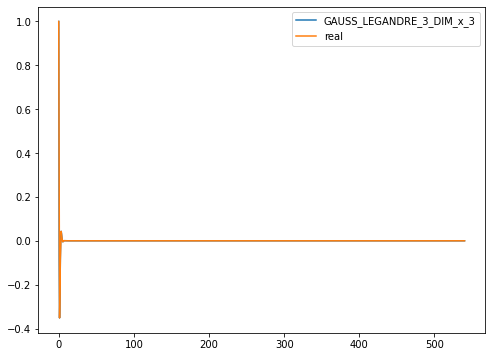

In [ ]:
n = 1000
h =  0.54
T = n*h

R_GAUSS_LEGANDRE_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
GAUSS_LEGANDRE_3_DIM(R_GAUSS_LEGANDRE_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y,z,t = zip(*R_GAUSS_LEGANDRE_3_DIM)

X = np.linspace(t_0,T,500)
Y_1 = [g(i)[0] for i in X]
Y_2 = [g(i)[1] for i in X]
Y_3 = [g(i)[2] for i in X]

plt.figure(figsize=(8,6))
plt.plot(x, y, label='GAUSS_LEGANDRE_3_DIM_x_1')
plt.plot(X, Y_1, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, z, label='GAUSS_LEGANDRE_3_DIM_x_2')
plt.plot(X, Y_2, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, t, label='GAUSS_LEGANDRE_3_DIM_x_3')
plt.plot(X, Y_3, label='real')
plt.legend()

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)


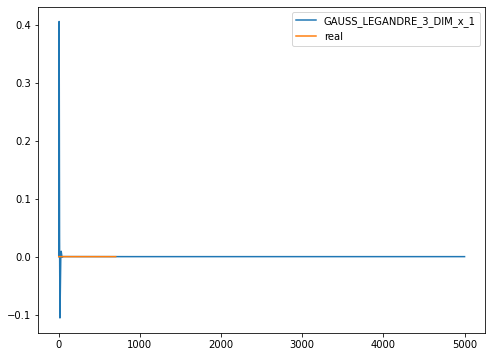

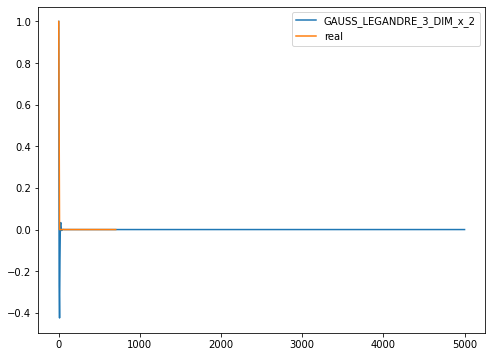

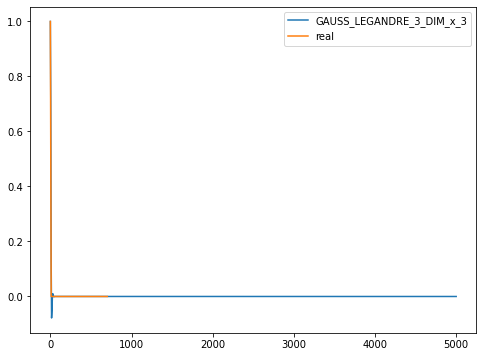

In [ ]:
n = 1000
h =  5
T = n*h

R_GAUSS_LEGANDRE_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
GAUSS_LEGANDRE_3_DIM(R_GAUSS_LEGANDRE_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y,z,t = zip(*R_GAUSS_LEGANDRE_3_DIM)

X = np.linspace(t_0,T,500)
Y_1 = [g(i)[0] for i in X]
Y_2 = [g(i)[1] for i in X]
Y_3 = [g(i)[2] for i in X]

plt.figure(figsize=(8,6))
plt.plot(x, y, label='GAUSS_LEGANDRE_3_DIM_x_1')
plt.plot(X, Y_1, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, z, label='GAUSS_LEGANDRE_3_DIM_x_2')
plt.plot(X, Y_2, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, t, label='GAUSS_LEGANDRE_3_DIM_x_3')
plt.plot(X, Y_3, label='real')
plt.legend()

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


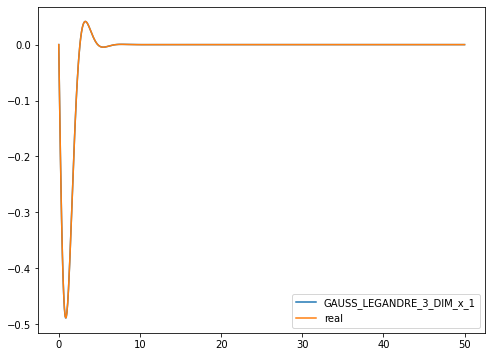

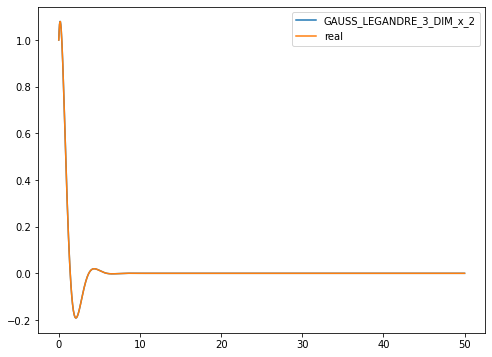

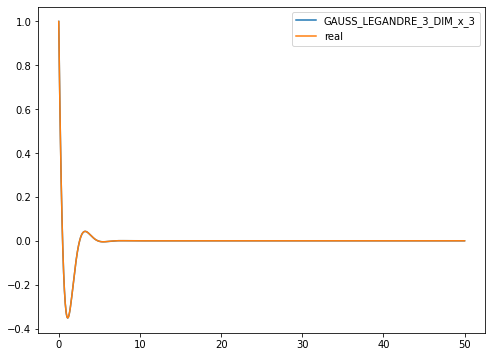

In [ ]:
n = 1000
h =  0.05
T = n*h

R_GAUSS_LEGANDRE_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
GAUSS_LEGANDRE_3_DIM(R_GAUSS_LEGANDRE_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y,z,t = zip(*R_GAUSS_LEGANDRE_3_DIM)

X = np.linspace(t_0,T,500)
Y_1 = [g(i)[0] for i in X]
Y_2 = [g(i)[1] for i in X]
Y_3 = [g(i)[2] for i in X]

plt.figure(figsize=(8,6))
plt.plot(x, y, label='GAUSS_LEGANDRE_3_DIM_x_1')
plt.plot(X, Y_1, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, z, label='GAUSS_LEGANDRE_3_DIM_x_2')
plt.plot(X, Y_2, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, t, label='GAUSS_LEGANDRE_3_DIM_x_3')
plt.plot(X, Y_3, label='real')
plt.legend()

## Adams-Moulton

In [ ]:
def A_M_3_DIM(R, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3): # 5-krokowy
    b_1 = 251./720.
    b_2 = 646./720.
    b_3 = (-264.)/720.
    b_4 = 106./720.
    b_5 = (-19.)/720.
    R[0] = [t_0, x_0_1, x_0_2, x_0_3]
    F = [f(t_0, x_0_1, x_0_2, x_0_3)]

    for i in range(1,4):
      R[i] = [t_0 + i*h, g(t_0 + i*h)[0], g(t_0 + i*h)[1], g(t_0 + i*h)[2]] # tworzymy (zakładamy, że je znamy, nie liczymy metodą jednokrokową) początkowe wartości w zależności od h
      F.append(f(R[i][0], R[i][1], R[i][2], R[i][3]))
    for i in range (4, n+1):

      def SOLVE(P):
        P_1, P_2, P_3 = P
        return [P_1 - R[i-1][1] - h*(b_2*F[i-1][0] + b_3*F[i-2][0] + b_4*F[i-3][0] + b_5*F[i-4][0] + b_1*f(t_0 + i*h, P_1, P_2, P_3)[0]),
                P_2 - R[i-1][2] - h*(b_2*F[i-1][1] + b_3*F[i-2][1] + b_4*F[i-3][1] + b_5*F[i-4][1] + b_1*f(t_0 + i*h, P_1, P_2, P_3)[1]),
                P_3 - R[i-1][3] - h*(b_2*F[i-1][2] + b_3*F[i-2][2] + b_4*F[i-3][2] + b_5*F[i-4][2] + b_1*f(t_0 + i*h, P_1, P_2, P_3)[2])]

      S = root(SOLVE, (R[i-1][1], R[i-1][2], R[i-1][3]))
      R[i] = [t_0 + i*h, S.x[0], S.x[1], S.x[2]]
      F.append(f(R[i][0], R[i][1], R[i][2], R[i][3]))

Krok graniczny dla metody Adamsa-Moultona: $$h=0.918$$

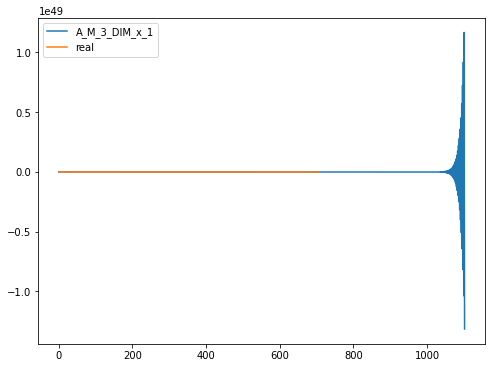

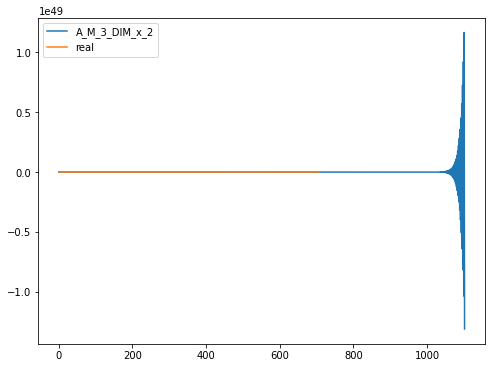

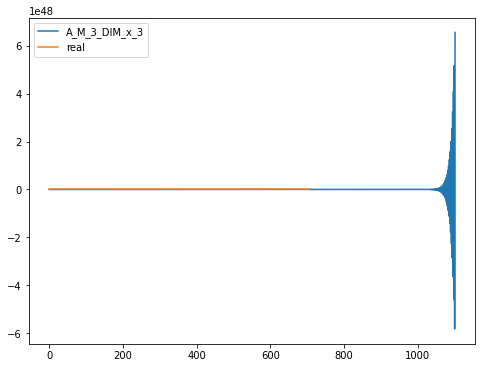

In [ ]:
np.seterr('ignore')
n = 1000
h = 0.918*1.2 #nienależący
T = n*h

R_A_M_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
A_M_3_DIM(R_A_M_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y,z,t = zip(*R_A_M_3_DIM)

X = np.linspace(t_0,T,500)
Y_1 = [g(i)[0] for i in X]
Y_2 = [g(i)[1] for i in X]
Y_3 = [g(i)[2] for i in X]

plt.figure(figsize=(8,6))
plt.plot(x, y, label='A_M_3_DIM_x_1')
plt.plot(X, Y_1, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, z, label='A_M_3_DIM_x_2')
plt.plot(X, Y_2, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, t, label='A_M_3_DIM_x_3')
plt.plot(X, Y_3, label='real')
plt.legend()

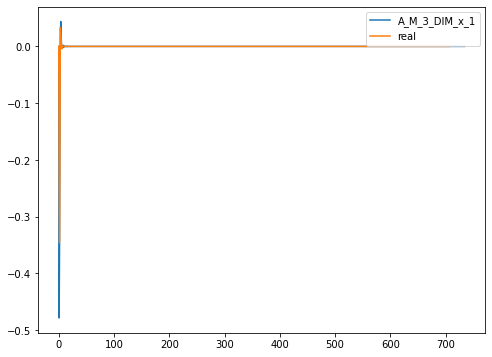

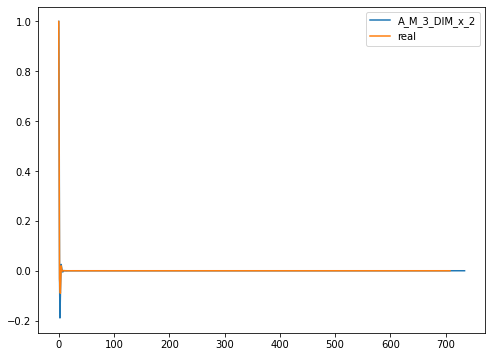

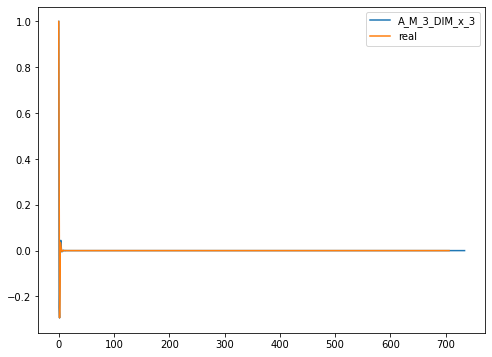

In [ ]:
n = 1000
h = 0.918*0.8 # należący
T = n*h

R_A_M_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
A_M_3_DIM(R_A_M_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y,z,t = zip(*R_A_M_3_DIM)

X = np.linspace(t_0,T,500)
Y_1 = [g(i)[0] for i in X]
Y_2 = [g(i)[1] for i in X]
Y_3 = [g(i)[2] for i in X]

plt.figure(figsize=(8,6))
plt.plot(x, y, label='A_M_3_DIM_x_1')
plt.plot(X, Y_1, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, z, label='A_M_3_DIM_x_2')
plt.plot(X, Y_2, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, t, label='A_M_3_DIM_x_3')
plt.plot(X, Y_3, label='real')
plt.legend()

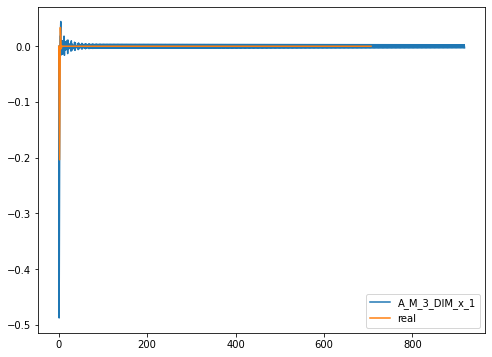

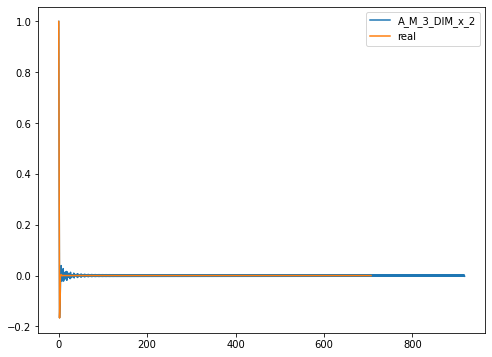

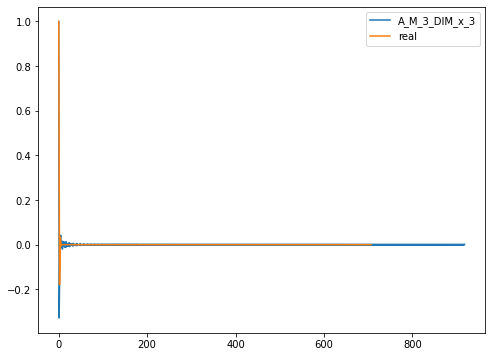

In [ ]:
n = 1000
h = 0.918 # krok graniczny
T = n*h

R_A_M_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
A_M_3_DIM(R_A_M_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y,z,t = zip(*R_A_M_3_DIM)

X = np.linspace(t_0,T,500)
Y_1 = [g(i)[0] for i in X]
Y_2 = [g(i)[1] for i in X]
Y_3 = [g(i)[2] for i in X]

plt.figure(figsize=(8,6))
plt.plot(x, y, label='A_M_3_DIM_x_1')
plt.plot(X, Y_1, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, z, label='A_M_3_DIM_x_2')
plt.plot(X, Y_2, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, t, label='A_M_3_DIM_x_3')
plt.plot(X, Y_3, label='real')
plt.legend()

## BDF6

In [ ]:
def BDF6_3_DIM(R, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3): # 6-krokowy
    b_6 = 60./147.
    a_1 = (-360.)/147.
    a_2 = 450./147.
    a_3 = (-400.)/147.
    a_4 = 225./147.
    a_5 = (-72.)/147.
    a_6 = 10./147.
    R[0] = [t_0, x_0_1, x_0_2, x_0_3]
    F = [f(t_0, x_0_1, x_0_2, x_0_3)]
    for i in range(1,6):
      R[i] = [t_0 + i*h, g(t_0 + i*h)[0], g(t_0 + i*h)[1], g(t_0 + i*h)[2]] # tworzymy (zakładamy, że je znamy, nie liczymy metodą jednokrokową) początkowe wartości w zależności od h
      F.append(f(R[i][0], R[i][1], R[i][2], R[i][3]))
    for i in range (6, n+1):

      def SOLVE(P):
        P1, P2, P3 = P
        return [P1 + a_1*R[i-1][1] + a_2*R[i-2][1] + a_3*R[i-3][1] + a_4*R[i-4][1] + a_5*R[i-5][1] + a_6*R[i-6][1] - b_6*h*f(t_0 + i*h, P1, P2, P3)[0],
                P2 + a_1*R[i-1][2] + a_2*R[i-2][2] + a_3*R[i-3][2] + a_4*R[i-4][2] + a_5*R[i-5][2] + a_6*R[i-6][2] - b_6*h*f(t_0 + i*h, P1, P2, P3)[1],
                P3 + a_1*R[i-1][3] + a_2*R[i-2][3] + a_3*R[i-3][3] + a_4*R[i-4][3] + a_5*R[i-5][3] + a_6*R[i-6][3] - b_6*h*f(t_0 + i*h, P1, P2, P3)[2]]

      S = fsolve(SOLVE, (R[i-1][1], R[i-1][2], R[i-1][3]))
      R[i] = [t_0 + i*h, S[0], S[1], S[2]]
      F.append(f(R[i][0], R[i][1], R[i][2], R[i][3]))

R_BDF6_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
BDF6_3_DIM(R_BDF6_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

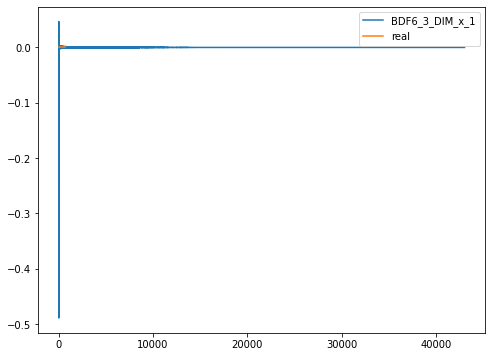

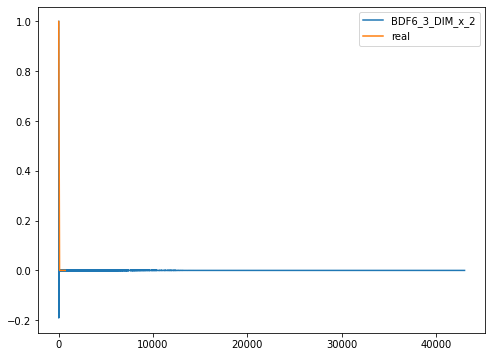

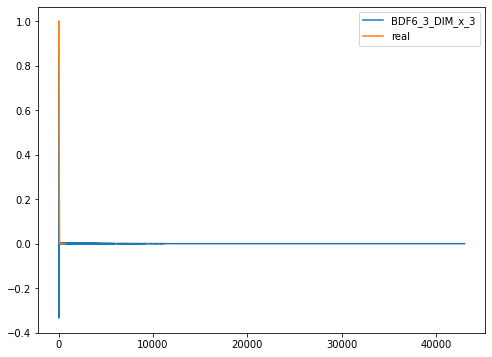

In [ ]:
n = 100000
h = 0.4305 # graniczny
T = n*h

R_BDF6_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
BDF6_3_DIM(R_BDF6_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y,z,t = zip(*R_BDF6_3_DIM)

X = np.linspace(t_0,T,500)
Y_1 = [g(i)[0] for i in X]
Y_2 = [g(i)[1] for i in X]
Y_3 = [g(i)[2] for i in X]

plt.figure(figsize=(8,6))
plt.plot(x, y, label='BDF6_3_DIM_x_1')
plt.plot(X, Y_1, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, z, label='BDF6_3_DIM_x_2')
plt.plot(X, Y_2, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, t, label='BDF6_3_DIM_x_3')
plt.plot(X, Y_3, label='real')
plt.legend()

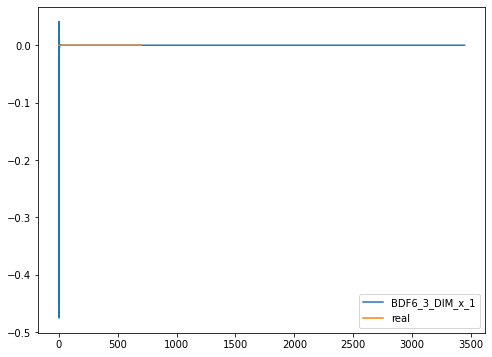

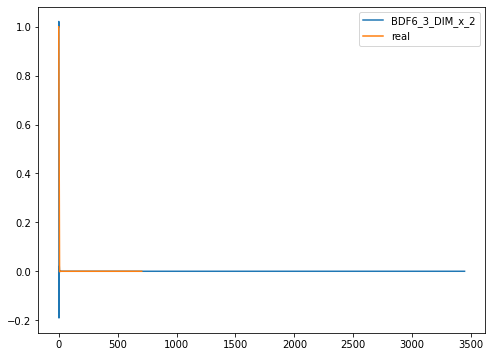

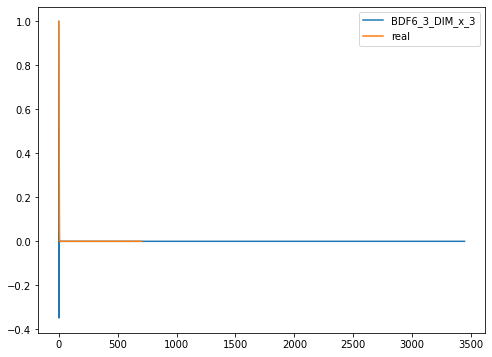

In [ ]:
n = 10000
h = 0.4305 * 0.8 # należący do obszaru
T = n*h

R_BDF6_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
BDF6_3_DIM(R_BDF6_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y,z,t = zip(*R_BDF6_3_DIM)

X = np.linspace(t_0,T,500)
Y_1 = [g(i)[0] for i in X]
Y_2 = [g(i)[1] for i in X]
Y_3 = [g(i)[2] for i in X]

plt.figure(figsize=(8,6))
plt.plot(x, y, label='BDF6_3_DIM_x_1')
plt.plot(X, Y_1, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, z, label='BDF6_3_DIM_x_2')
plt.plot(X, Y_2, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, t, label='BDF6_3_DIM_x_3')
plt.plot(X, Y_3, label='real')
plt.legend()

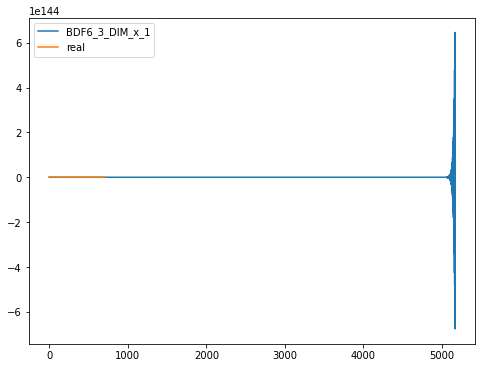

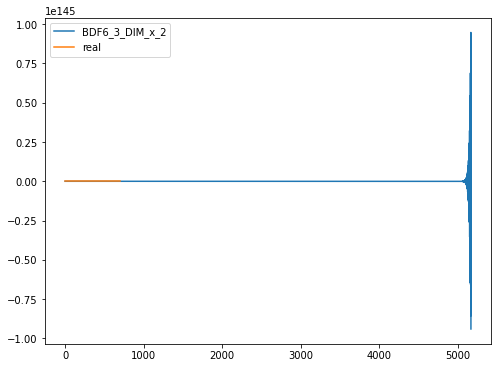

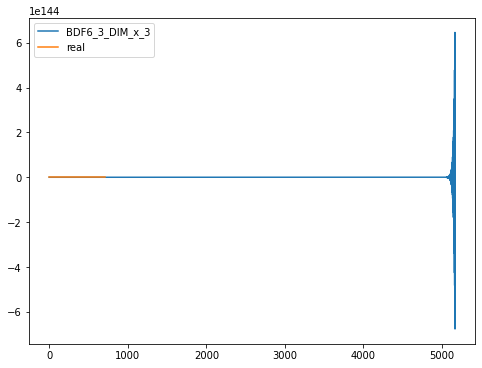

In [ ]:
n = 10000
h = 0.4305 * 1.2 # nienależący do obszaru
T = n*h

R_BDF6_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
BDF6_3_DIM(R_BDF6_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y,z,t = zip(*R_BDF6_3_DIM)

X = np.linspace(t_0,T,500)
Y_1 = [g(i)[0] for i in X]
Y_2 = [g(i)[1] for i in X]
Y_3 = [g(i)[2] for i in X]

plt.figure(figsize=(8,6))
plt.plot(x, y, label='BDF6_3_DIM_x_1')
plt.plot(X, Y_1, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, z, label='BDF6_3_DIM_x_2')
plt.plot(X, Y_2, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, t, label='BDF6_3_DIM_x_3')
plt.plot(X, Y_3, label='real')
plt.legend()

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


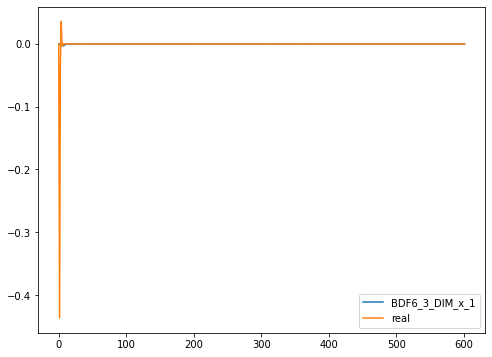

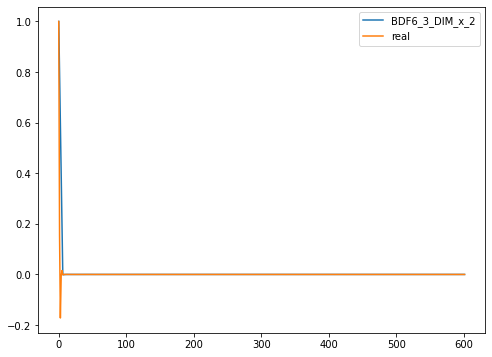

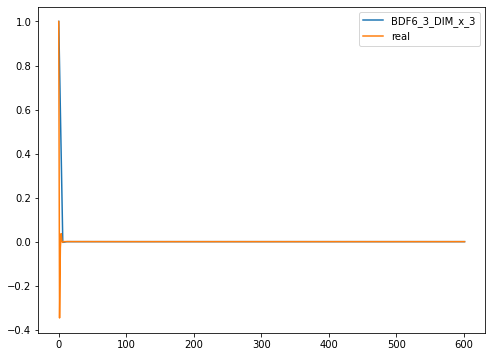

In [ ]:
n = 100
h = 6.014 # graniczny
T = n*h

R_BDF6_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
BDF6_3_DIM(R_BDF6_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y,z,t = zip(*R_BDF6_3_DIM)

X = np.linspace(t_0,T,500)
Y_1 = [g(i)[0] for i in X]
Y_2 = [g(i)[1] for i in X]
Y_3 = [g(i)[2] for i in X]

plt.figure(figsize=(8,6))
plt.plot(x, y, label='BDF6_3_DIM_x_1')
plt.plot(X, Y_1, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, z, label='BDF6_3_DIM_x_2')
plt.plot(X, Y_2, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, t, label='BDF6_3_DIM_x_3')
plt.plot(X, Y_3, label='real')
plt.legend()

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


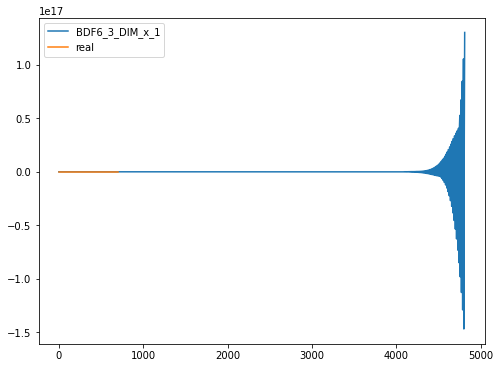

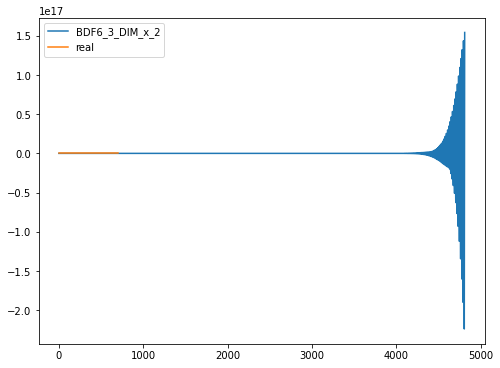

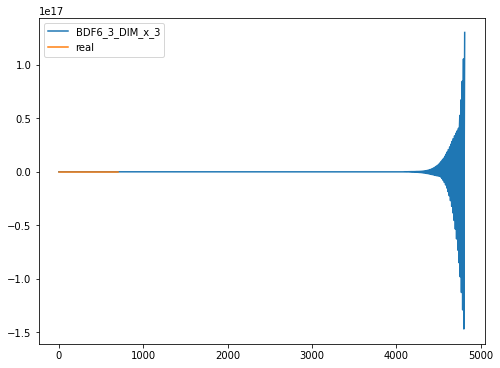

In [ ]:
n = 1000
h = 6.014 * 0.8 # nienależący do obszaru
T = n*h

R_BDF6_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
BDF6_3_DIM(R_BDF6_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y,z,t = zip(*R_BDF6_3_DIM)

X = np.linspace(t_0,T,500)
Y_1 = [g(i)[0] for i in X]
Y_2 = [g(i)[1] for i in X]
Y_3 = [g(i)[2] for i in X]

plt.figure(figsize=(8,6))
plt.plot(x, y, label='BDF6_3_DIM_x_1')
plt.plot(X, Y_1, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, z, label='BDF6_3_DIM_x_2')
plt.plot(X, Y_2, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, t, label='BDF6_3_DIM_x_3')
plt.plot(X, Y_3, label='real')
plt.legend()

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


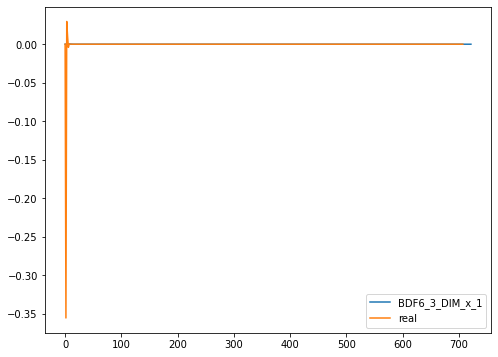

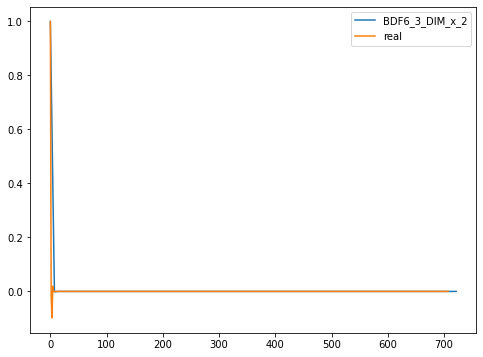

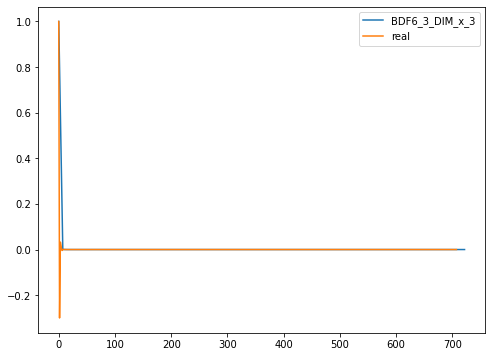

In [ ]:
n = 100
h = 6.014 * 1.2 # należący do obszaru
T = n*h

R_BDF6_3_DIM = np.zeros(shape=(n+1,4)) # tworzymy tablicę z punktami podziału i wartościami numerycznego rozwiązania
BDF6_3_DIM(R_BDF6_3_DIM, n, h, f, t_0, T, x_0_1, x_0_2, x_0_3)

# sklejamy powyższe wartości, żeby móc je narysować razem z prawdziwym rozwiązaniem
x,y,z,t = zip(*R_BDF6_3_DIM)

X = np.linspace(t_0,T,500)
Y_1 = [g(i)[0] for i in X]
Y_2 = [g(i)[1] for i in X]
Y_3 = [g(i)[2] for i in X]

plt.figure(figsize=(8,6))
plt.plot(x, y, label='BDF6_3_DIM_x_1')
plt.plot(X, Y_1, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, z, label='BDF6_3_DIM_x_2')
plt.plot(X, Y_2, label='real')
plt.legend()
plt.figure(figsize=(8,6))
plt.plot(x, t, label='BDF6_3_DIM_x_3')
plt.plot(X, Y_3, label='real')
plt.legend()